# EDA Zestawu danych - Iris

In [21]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.display import Markdown


In [2]:
# Wczytanie danych
df = pd.read_csv('25__iris.csv', sep=",")

![Alternatywny tekst](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*vVQiaTZVaK5rK31vizP0zA.png)

## 1) Wstepna inspekcja danych:

In [3]:
#  Wyświetlenie 5 pierwszych wierszy
df.head()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Wyświetlenie 5 ostatnich wierszy
df.tail()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Wyświetlenie 5 losowych wierszy
df.sample(5)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
98,5.1,2.5,3.0,1.1,Iris-versicolor
109,7.2,3.6,6.1,2.5,Iris-virginica
87,6.3,2.3,4.4,1.3,Iris-versicolor
115,6.4,3.2,5.3,2.3,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica


In [6]:
# Sprawdzenie unikatowych wartości 
df.nunique() 

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64

In [7]:
# Sprawdzenie jakie typy danych sa w zbiorze
df.dtypes

długość kielicha (sepal length)     float64
szerokość kielicha (sepal width)    float64
długość płatka (petal length)       float64
szerokość płatka (petal width)      float64
klasa (class)                        object
dtype: object

## 2) Czyszczenie danych:

In [8]:
# Zmiana nazw kolumn
df = df.rename(columns={'klasa (class)':'Odmiana',
                        'długość kielicha (sepal length)':'Długość_Kielicha', 
                        'szerokość kielicha (sepal width)':'Szerokość_Kielicha', 
                        'długość płatka (petal length)':'Długość_Płatka', 
                        'szerokość płatka (petal width)':'Szerokość_Płatka', 
                        }) 

In [9]:
# Sprawdzenie brakujacych danych.  
df.isnull().sum() 

Długość_Kielicha      0
Szerokość_Kielicha    0
Długość_Płatka        0
Szerokość_Płatka      0
Odmiana               0
dtype: int64

In [10]:
# Sprawdzenie gdzie wystepują duplikaty
df.loc[df.duplicated]

,Długość_Kielicha,Szerokość_Kielicha,Długość_Płatka,Szerokość_Płatka,Odmiana
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


## 3) Analiza jednowymiarowa:

In [11]:
# Podsumowanie wszystkich kolumn numerycznych
df.describe() 

,Długość_Kielicha,Szerokość_Kielicha,Długość_Płatka,Szerokość_Płatka
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Przegląd wartości dla wszystkich odmian
df.groupby('Odmiana', as_index=False).agg({ 
    'Długość_Kielicha': ['min', 'max', 'mean', 'median'],
    'Szerokość_Kielicha': ['min', 'max', 'mean', 'median'],
    'Długość_Płatka': ['min', 'max', 'mean', 'median'],
    'Szerokość_Płatka': ['min', 'max', 'mean', 'median']
})

Odmiana Długość_Kielicha                    Szerokość_Kielicha  \
                                min  max   mean median                min   
0      Iris-setosa              4.3  5.8  5.006    5.0                2.3   
1  Iris-versicolor              4.9  7.0  5.936    5.9                2.0   
2   Iris-virginica              4.9  7.9  6.588    6.5                2.2   

                     Długość_Płatka                    Szerokość_Płatka       \
   max   mean median            min  max   mean median              min  max   
0  4.4  3.418    3.4            1.0  1.9  1.464   1.50              0.1  0.6   
1  3.4  2.770    2.8            3.0  5.1  4.260   4.35              1.0  1.8   
2  3.8  2.974    3.0            4.5  6.9  5.552   5.55              1.4  2.5   

                 
    mean median  
0  0.244    0.2  
1  1.326    1.3  
2  2.026    2.0

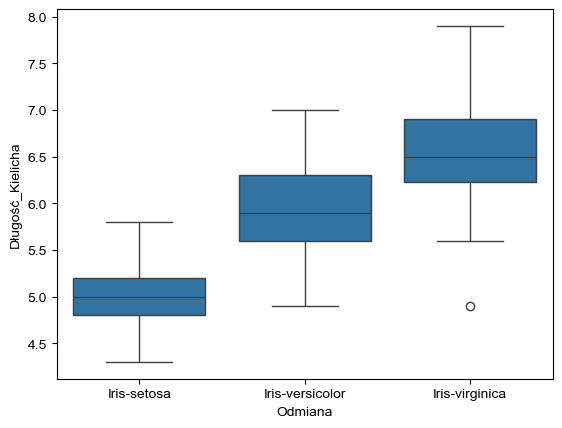

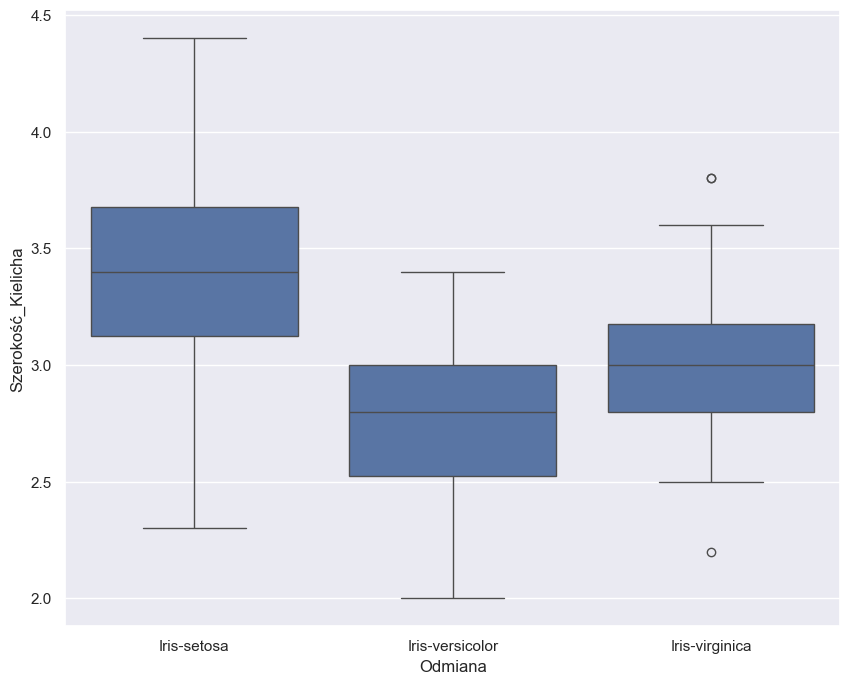

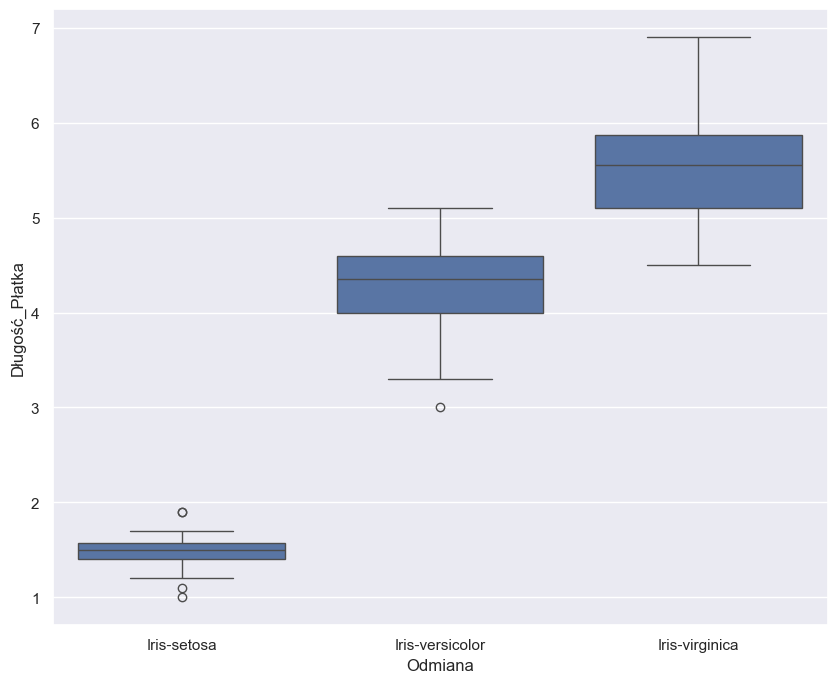

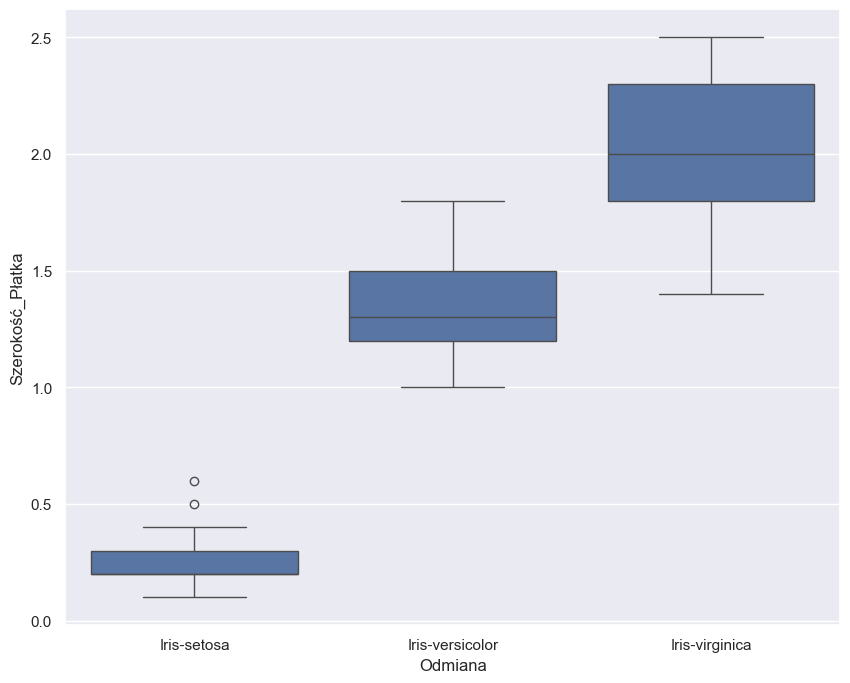

In [13]:

kolumny= ['Długość_Kielicha','Szerokość_Kielicha','Długość_Płatka','Szerokość_Płatka'] 

for i, col in enumerate(kolumny):
    plt.figure(i)
    sns.boxplot(x = 'Odmiana', y = col, data = df) 
    sns.set(rc={'figure.figsize':(10,8)})

plt.show()

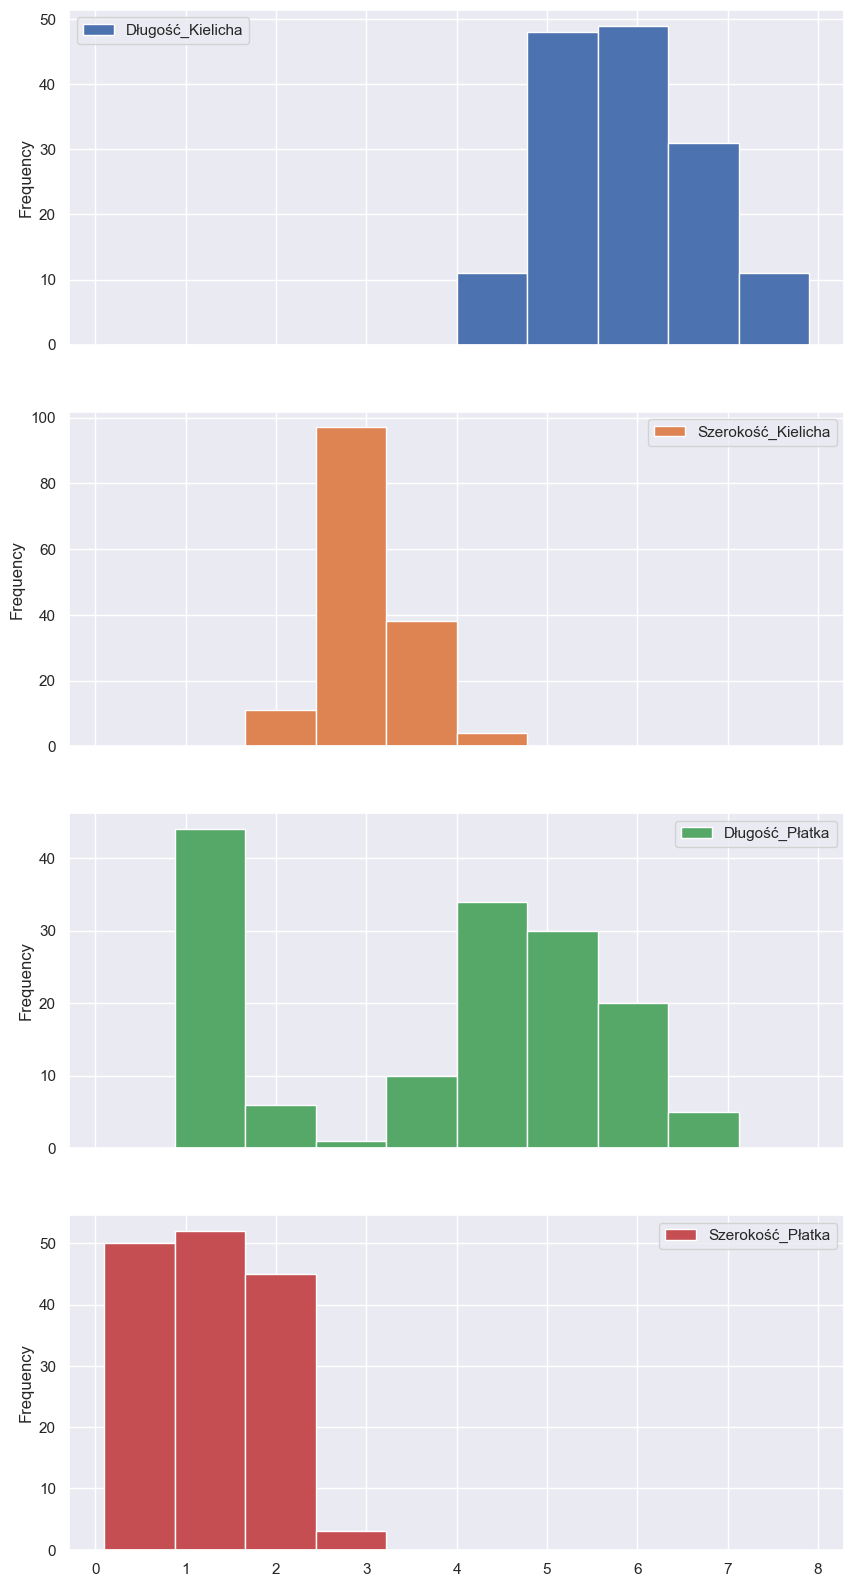

In [14]:
df.plot(kind="hist",subplots=True, figsize=(10, 20))
plt.show()

## 4) Analiza dwuwymiarowa:

In [15]:

x_var = 'Długość_Płatka'
y_var = 'Szerokość_Płatka'
w_var = 'Długość_Kielicha'
z_var = 'Szerokość_Kielicha'


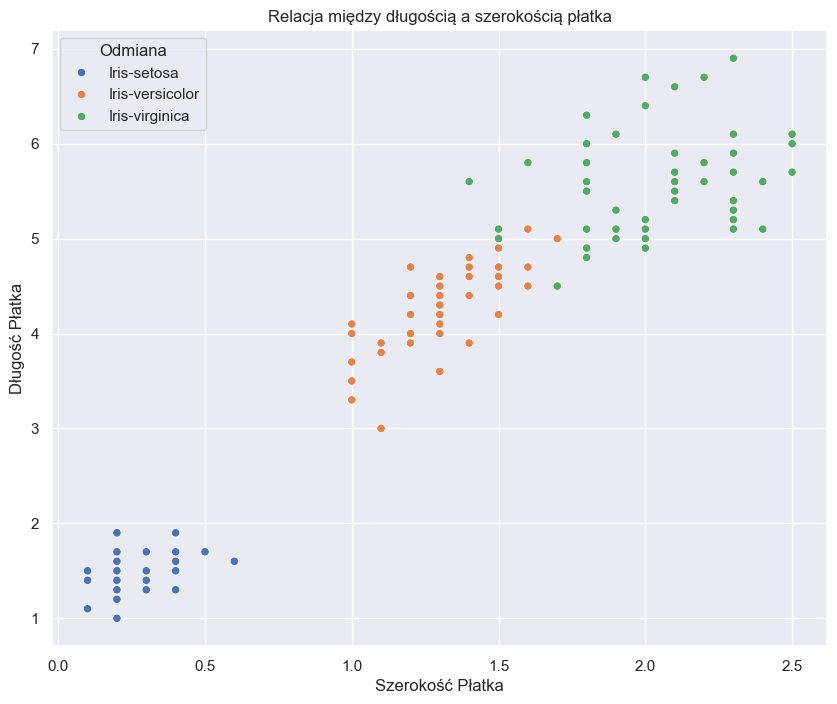

In [16]:

sns.scatterplot(x=y_var, y=x_var, hue='Odmiana', data=df)
plt.xlabel('Szerokość Płatka')
plt.ylabel('Długość Płatka')
plt.title('Relacja między długością a szerokością płatka')
plt.show()

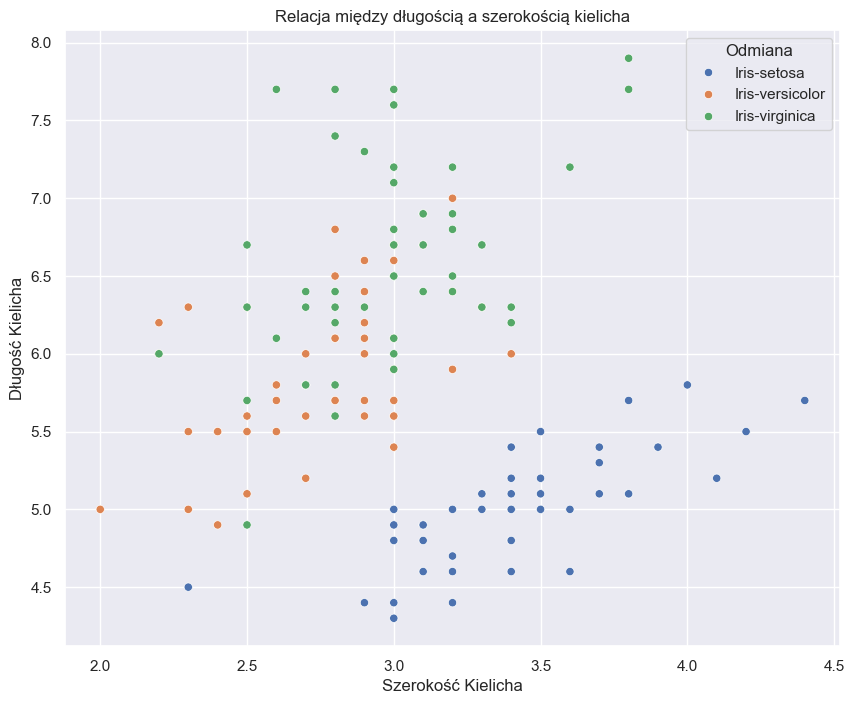

In [17]:

sns.scatterplot(x=z_var, y=w_var, hue='Odmiana', data=df)
plt.xlabel('Szerokość Kielicha')
plt.ylabel('Długość Kielicha')
plt.title('Relacja między długością a szerokością kielicha')
plt.show()

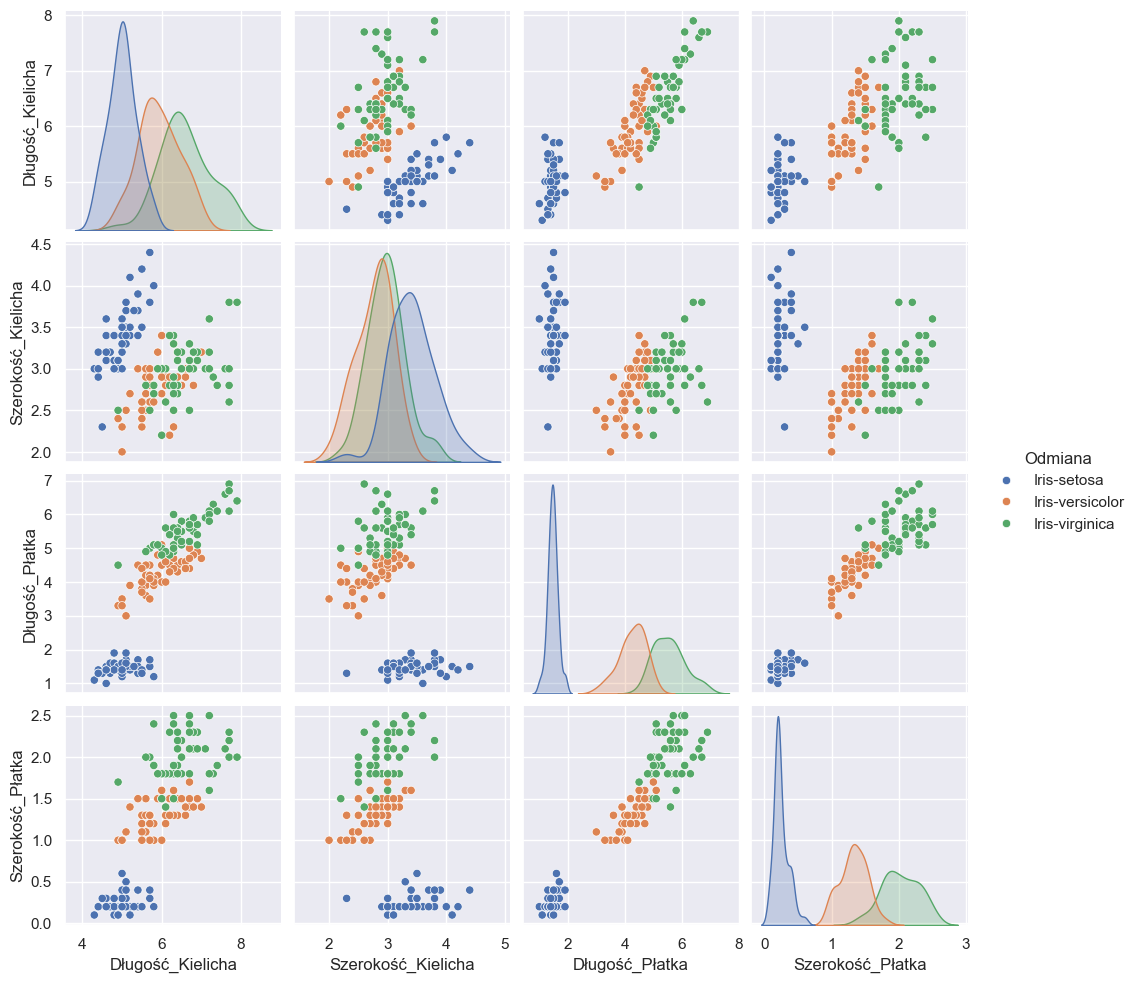

In [18]:
# Wykres par
sns.pairplot(df, hue='Odmiana')
plt.show()

In [19]:

df_corr = df[['Długość_Kielicha', 'Szerokość_Kielicha', 'Długość_Płatka', 'Szerokość_Płatka']].corr()
df_corr

,Długość_Kielicha,Szerokość_Kielicha,Długość_Płatka,Szerokość_Płatka
Długość_Kielicha,1.000000,-0.109369,0.871754,0.817954
Szerokość_Kielicha,-0.109369,1.000000,-0.420516,-0.356544
Długość_Płatka,0.871754,-0.420516,1.000000,0.962757
Szerokość_Płatka,0.817954,-0.356544,0.962757,1.000000


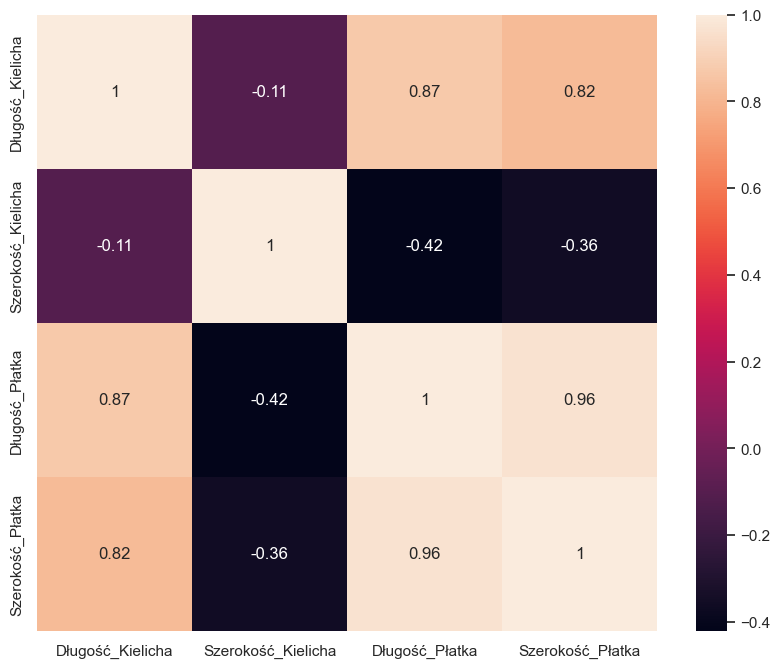

In [20]:
# Wykres korelacji
sns.heatmap(df_corr, annot=True) \
    .plot(set_title='Wykres korelacji')
plt.show()

# *Wnioski końcowe:*



## *Na podstawie przeprowadzonej analizy danych dotyczącej zbioru danych*
##   *Iris - można wyciągnąć następujące wnioski:*

### 1) **Struktura Danych:**

* #### Zbiór danych jest kompletny i składa się z 150 wierszy oraz 5 kolumn. Każda odmiana
#### Irysa zawiera 50 rekordów, co zapewnia równowagę w analizie danych.

### 2) **Charakterystyka odmian:**

* #### Setosa: Jest najmniejsza spośród trzech odmian. Średnia długość kielicha wynosi 5cm, 
#### a szerokość 3.4cm. Płatki tego gatunku charakteryzują się średnią 
#### długością 1.5cm i szerokością 0.2cm.
#### * Versicolor: Stanowi średnią odmianę. Średnia długość kielicha to 5.9cm, a szerokość 
#### 2.8cm. Płatki mają średnią długość 4.35cm i szerokość 1.3cm.
* #### Virginica: Jest największą odmianą. Średnia długość jej kielicha to 6.5cm, 
#### z szerokością 3cm. Płatki tej odmiany mają średnią długość 5.55cm i szerokość 2cm.

### 3) **Granice Między Gatunkami:**

* #### Analiza wykazała, że już z użyciem zaledwie 2-3 wykresów można jednoznacznie określić 
#### różnice i granice między badanymi gatunkami Irysa. Każda odmiana ujawnia unikalne 
#### wzorce w wymiarach kielichów i płatków.

### 4) **Zastosowanie Modelu Uczenia Maszynowego:**

* #### Wyraźnie zdefiniowane granice między odmianami sugerują, że model uczenia maszynowego 
#### z wysokim prawdopodobieństwem będzie w stanie poprawnie nauczyć się identyfikować gatunki 
#### na podstawie wymiarów, co może być praktyczne w klasyfikacji nowych próbek.

### 5) **Zastosowania Praktyczne:**

* #### Wyciągnięte wzorce i granice mogą mieć zastosowanie w klasyfikacji i identyfikacji 
#### gatunkowej na podstawie morfologii, co jest wartościowe w kontekście badań 
#### botanicznych oraz zastosowań przemysłowych.
<br><br>

### *Podsumowując, analiza EDA dostarcza istotnych wniosków na temat* 
### *struktury i różnic między odmianami kwiatu Irys, co tworzy solidną* 
### *podstawę do dalszych badań i rozwijania modeli predykcyjnych.*

